In [1]:
import os
import xarray as xr
import sys
import itertools
from itertools import zip_longest
import pandas as pd
import numpy as np
import xarray as xr
import pickle
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import colormaps
#list(colormaps)
plt.rcParams['font.family'] = 'Times New Roman'
matplotlib.style.use('tableau-colorblind10') #seaborn-v0_8-whitegrid  tableau-colorblind10

In [2]:
with open('../dlcia_output/final_allV_mod/BEV_comb_final_ds_50dict.pkl', 'rb') as f:
    bev = pickle.load(f)

In [3]:
print(bev[1][0])
bev[1][1]

{'V1A_V1B_init': 'LFP', 'F2_fuel_elec': 'grid', 'V1B_repl': 'LSB'}


<xarray.Dataset>
Dimensions:    (SSP: 3, v_year: 3, dpLCA_IC: 3, lcia_year: 121)
Coordinates:
  * SSP        (SSP) object 'ssp119' 'ssp245' 'ssp585'
  * v_year     (v_year) int32 2030 2040 2050
  * dpLCA_IC   (dpLCA_IC) object 'dpIRF' 'dpCRF' 'dpGWP'
  * lcia_year  (lcia_year) int32 0 1 2 3 4 5 6 7 ... 114 115 116 117 118 119 120
Data variables:
    dplcia     (SSP, v_year, dpLCA_IC, lcia_year) float64 4.182e-10 ... nan

### see all tech comb: 

In [4]:
mybev_tech = {'V1A_V1B_init': 'NMC622', 'F2_fuel_elec': 'grid', 'V1B_repl': 'LFP'}
for i in range(len(bev)):  
    if (bev[i][0]) ==  mybev_tech:
        print(i)

40


In [5]:
mybevds = bev[40][1]
mybevds2 = bev[1][1]

### dpCRF - final BEV by  all SSP [1/2/5]  

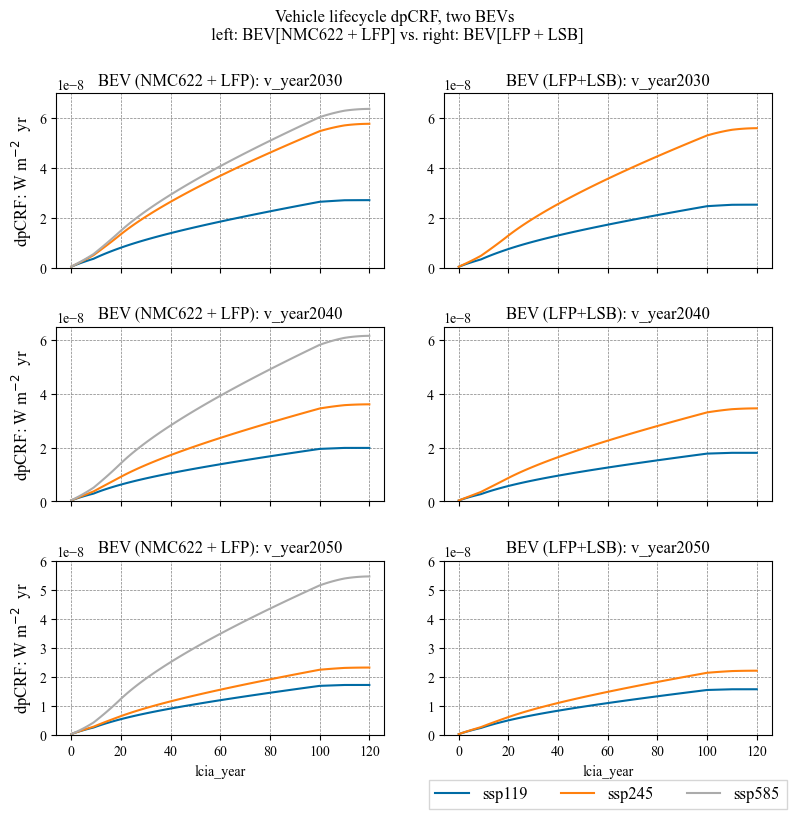

In [10]:
fig, axs = plt.subplots(3, 2, figsize=( 8, 8 ))
vylist = [2030, 2040, 2050] 
for i, vy in zip( range(3), vylist):
    for j in range(2) : 
        axs[i,j].grid(True, linestyle='--', linewidth=0.5, color='gray')
        axs[0,0].set_ylim(0, 7e-8) 
        axs[0,1].set_ylim(0, 7e-8) 
        axs[1,0].set_ylim(0, 6.5e-8) 
        axs[1,1].set_ylim(0, 6.5e-8)
        axs[2,0].set_ylim(0, 6e-8) 
        axs[2,1].set_ylim(0, 6e-8)
        
        ax = axs[i,j]
        if j == 0: 
            yy_bev = mybevds.sel(v_year = vy, SSP = ['ssp119', 'ssp245' , 'ssp585'], dpLCA_IC = 'dpCRF')['dplcia']
            yy_bev.plot(x='lcia_year', hue= 'SSP', ax=ax, add_legend=False)
            subtitle =   "BEV (NMC622 + LFP): v_year" +  str(vy)
            axs[i,j].set_title(subtitle)
            axs[i,j].set_ylabel('dpCRF: W m$^{-2}$  yr', fontsize=12 ) 
            
        elif j == 1: 
            yy_icev = mybevds2.sel(v_year = vy, SSP = ['ssp119', 'ssp245' , 'ssp585'],  dpLCA_IC = 'dpCRF')['dplcia']
            yy_icev.plot(x='lcia_year', hue= 'SSP', ax=ax, add_legend=False)
            subtitle =   "BEV (LFP+LSB): v_year" +  str(vy) 
            axs[i,j].set_title(subtitle)
            axs[i,j].set_ylabel(' ')
            
        if i != 2:
            axs[i,j].set_xticklabels([]) 
            axs[i,j].set_xlabel('') 

label = ['ssp119', 'ssp245' , 'ssp585']
fig.legend(label, loc='lower right', bbox_to_anchor=(1, -0.03), fancybox=False,  ncol=4, prop={'size': 12})


tt = 'Vehicle lifecycle dpCRF, two BEVs' + '\n left: BEV[NMC622 + LFP] vs. right: BEV[LFP + LSB]'
fig.suptitle(tt , fontsize=12)
plt.tight_layout()
plt.savefig('Fig7_BEVvsBEV.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [11]:
aa ,bb = [],[]

for v_y in [2030, 2040, 2050]: 
    for sp in ['ssp119',  'ssp245', 'ssp585' ]: 
        a =  mybevds.sel(v_year = v_y, SSP = sp , dpLCA_IC = 'dpCRF')['dplcia']
        b =  mybevds2.sel(v_year = v_y, SSP = sp , dpLCA_IC = 'dpCRF')['dplcia']
        diff = (a.values[-1] - b.values[-1]) / a.values[-1]
        print(f"for v_year{v_y}, {sp}, % diff is {diff}" )

for v_year2030, ssp119, % diff is 0.06690523819524119
for v_year2030, ssp245, % diff is 0.030589936472663365
for v_year2030, ssp585, % diff is nan
for v_year2040, ssp119, % diff is 0.09161555867021418
for v_year2040, ssp245, % diff is 0.04161072017709037
for v_year2040, ssp585, % diff is nan
for v_year2050, ssp119, % diff is 0.08571953203634552
for v_year2050, ssp245, % diff is 0.046654805622277806
for v_year2050, ssp585, % diff is nan


### dpCRF - final BEV [NMC*2]  vs. [LFP * 2]  

In [12]:
mybev_tech33 = {'V1A_V1B_init': 'NMC622', 'F2_fuel_elec': 'grid', 'V1B_repl': 'NMC622'}
for i in range(len(bev)):  
    if (bev[i][0]) ==  mybev_tech33:
        print(i)

mybev_tech66 = {'V1A_V1B_init': 'LFP', 'F2_fuel_elec': 'grid', 'V1B_repl': 'LFP'}
for i in range(len(bev)):  
    if (bev[i][0]) ==  mybev_tech66:
        print(i)

44
0


In [13]:
mybevds33 = bev[44][1]
mybevds66 = bev[0][1]

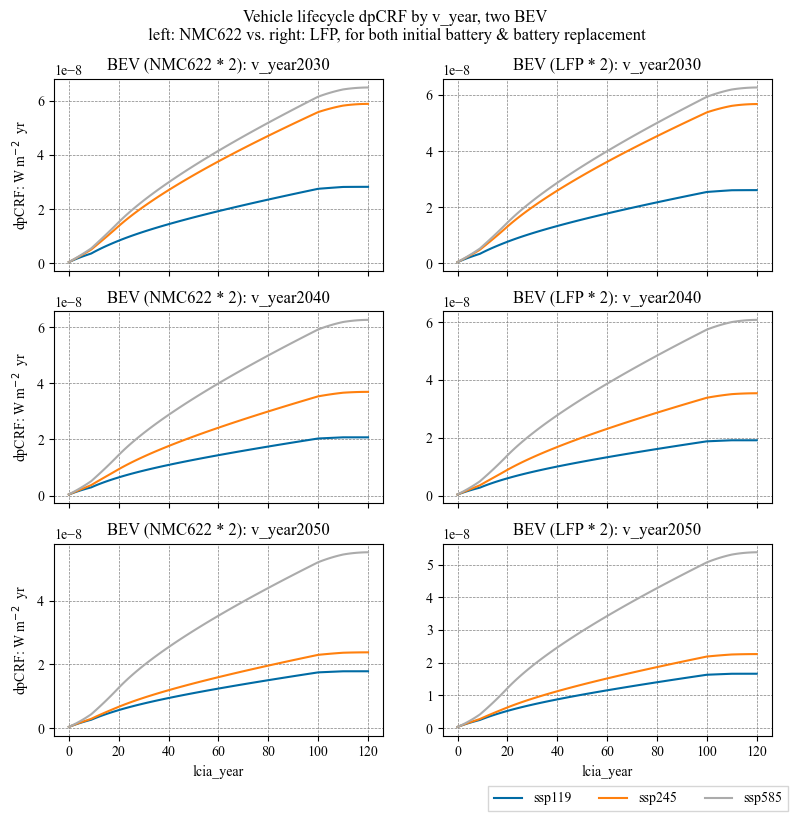

In [14]:
fig, axs = plt.subplots(3, 2, figsize=( 8, 8 ))
vylist = [2030, 2040, 2050] 
for i, vy in zip( range(3), vylist):
    for j in range(2) : 
        axs[i,j].grid(True, linestyle='--', linewidth=0.5, color='gray')
        """
        axs[0,0].set_ylim(0, 4.2e-8) 
        axs[0,1].set_ylim(0, 4.2e-8) 
        axs[1,0].set_ylim(0, 4e-8) 
        axs[1,1].set_ylim(0, 4e-8)
        axs[2,0].set_ylim(0, 3.5e-8) 
        axs[2,1].set_ylim(0, 3.5e-8)
        """
        ax = axs[i,j]
        if j == 0: 
            yy_bev = mybevds33.sel(v_year = vy, SSP = ['ssp119',  'ssp245', 'ssp585' ], dpLCA_IC = 'dpCRF')['dplcia']
            yy_bev.plot(x='lcia_year', hue= 'SSP', ax=ax, add_legend=False)
            subtitle =   "BEV (NMC622 * 2): v_year" +  str(vy)
            axs[i,j].set_title(subtitle)
            axs[i,j].set_ylabel('dpCRF: W m$^{-2}$  yr') 
            
        elif j == 1: 
            yy_icev = mybevds66.sel(v_year = vy, SSP = ['ssp119',  'ssp245', 'ssp585' ], dpLCA_IC = 'dpCRF')['dplcia']
            yy_icev.plot(x='lcia_year', hue= 'SSP', ax=ax, add_legend=False)
            subtitle =   "BEV (LFP * 2): v_year" +  str(vy) 
            axs[i,j].set_title(subtitle)
            axs[i,j].set_ylabel(' ')
            
        if i != 2:
            axs[i,j].set_xticklabels([]) 
            axs[i,j].set_xlabel('') 

label = ['ssp119',  'ssp245', 'ssp585' ]
fig.legend(label, loc='lower right', bbox_to_anchor=(1, -0.03), fancybox=False,  ncol=4)

tt = 'Vehicle lifecycle dpCRF by v_year, two BEV' + '\n left: NMC622 vs. right: LFP, for both initial battery & battery replacement'
fig.suptitle(tt , fontsize=12)
plt.tight_layout()
plt.show()

In [15]:
aa ,bb = [],[]

for v_y in [2030, 2040, 2050]: 
    for sp in ['ssp119',  'ssp245', 'ssp585' ]: 
        a =  mybevds33.sel(v_year = v_y, SSP = sp , dpLCA_IC = 'dpCRF')['dplcia']
        b =  mybevds66.sel(v_year = v_y, SSP = sp , dpLCA_IC = 'dpCRF')['dplcia']
        diff = (a.values[-1] - b.values[-1]) / a.values[-1]
        print(f"for v_year{v_y}, {sp}, % diff is {diff}" )


for v_year2030, ssp119, % diff is 0.07638496687139243
for v_year2030, ssp245, % diff is 0.03558320650862446
for v_year2030, ssp585, % diff is 0.034482498658861785
for v_year2040, ssp119, % diff is 0.07917607798877577
for v_year2040, ssp245, % diff is 0.042956548987517516
for v_year2040, ssp585, % diff is 0.029698500315642397
for v_year2050, ssp119, % diff is 0.07069732134848201
for v_year2050, ssp245, % diff is 0.050626359381158365
for v_year2050, ssp585, % diff is 0.02799444390057907
